# **Challenge Telecom X: análisis de evasión de clientes - Parte 2**

# **Librerias**

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

import pickle

# **Preparacion de los datos**

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Estadisticas y Machine Learning G8 - ONE/8. Challenge Telecom X: análisis de evasión de clientes - Parte 2/datos/datos_tratados_telecomX.csv')
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias,total_services
0,0002-ORFBO,0,Female,0,True,True,9,1,0,DSL,0,1,0,1,1,0,One year,True,Mailed check,65.60,593.30,2.19,4
1,0003-MKNFE,0,Male,0,False,False,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,False,Mailed check,59.90,542.40,2.00,3
2,0004-TLHLJ,1,Male,0,False,False,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,True,Electronic check,73.90,280.85,2.46,2
3,0011-IGKFF,1,Male,1,True,False,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,True,Electronic check,98.00,1237.85,3.27,5
4,0013-EXCHZ,1,Female,1,True,False,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,True,Mailed check,83.90,267.40,2.80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,9985-MWVIX,1,Female,0,False,False,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,True,Mailed check,70.15,70.15,2.34,1
4828,9987-LUTYD,0,Female,0,False,False,13,1,0,DSL,1,0,0,1,0,0,One year,False,Mailed check,55.15,742.90,1.84,3
4829,9992-RRAMN,1,Male,0,True,False,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,True,Electronic check,85.10,1873.70,2.84,3
4830,9992-UJOEL,0,Male,0,False,False,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,True,Mailed check,50.30,92.75,1.68,2


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 4832 non-null   object 
 1   churn                      4832 non-null   int64  
 2   customer_gender            4832 non-null   object 
 3   customer_seniorcitizen     4832 non-null   int64  
 4   customer_partner           4832 non-null   bool   
 5   customer_dependents        4832 non-null   bool   
 6   customer_tenure            4832 non-null   int64  
 7   phone_phoneservice         4832 non-null   int64  
 8   phone_multiplelines        4832 non-null   int64  
 9   internet_internetservice   4832 non-null   object 
 10  internet_onlinesecurity    4832 non-null   int64  
 11  internet_onlinebackup      4832 non-null   int64  
 12  internet_deviceprotection  4832 non-null   int64  
 13  internet_techsupport       4832 non-null   int64

In [6]:
datos.describe()

,churn,customer_seniorcitizen,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_charges_monthly,account_charges_total,Cuentas_Diarias,total_services
count,4832.000000,4832.000000,4832.000000,4832.0,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000
mean,0.328228,0.204056,33.056705,1.0,0.543667,0.358858,0.442674,0.437707,0.362790,0.500828,0.503518,81.761207,2902.470788,2.725362,4.150041
std,0.469617,0.403052,24.636200,0.0,0.498141,0.479715,0.496754,0.496156,0.480855,0.500051,0.500039,18.306134,2415.564128,0.610285,1.900779
min,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.900000,42.900000,1.430000,1.000000
25%,0.000000,0.000000,9.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.787500,659.600000,2.330000,3.000000
50%,0.000000,0.000000,30.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,82.500000,2350.625000,2.750000,4.000000
75%,1.000000,0.000000,56.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.700000,4871.150000,3.190000,6.000000
max,1.000000,1.000000,72.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,8.000000


## **Eliminando identificadores unicos**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [7]:
datos = datos.drop(['customerid'], axis=1)

In [8]:
datos

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias,total_services
0,0,Female,0,True,True,9,1,0,DSL,0,1,0,1,1,0,One year,True,Mailed check,65.60,593.30,2.19,4
1,0,Male,0,False,False,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,False,Mailed check,59.90,542.40,2.00,3
2,1,Male,0,False,False,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,True,Electronic check,73.90,280.85,2.46,2
3,1,Male,1,True,False,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,True,Electronic check,98.00,1237.85,3.27,5
4,1,Female,1,True,False,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,True,Mailed check,83.90,267.40,2.80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,1,Female,0,False,False,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,True,Mailed check,70.15,70.15,2.34,1
4828,0,Female,0,False,False,13,1,0,DSL,1,0,0,1,0,0,One year,False,Mailed check,55.15,742.90,1.84,3
4829,1,Male,0,True,False,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,True,Electronic check,85.10,1873.70,2.84,3
4830,0,Male,0,False,False,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,True,Mailed check,50.30,92.75,1.68,2


# **Correlacion y seleccion de variables**

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como **[one-hot encoding](https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.preprocessing.OneHotEncoder.html)**.

**¿Por qué usar OneHotEncoder?**

pd.get_dummies es muy útil y directo para codificación rápida, pero OneHotEncoder ofrece más control, especialmente cuando vas a usar tus datos en modelos de machine learning con Scikit-Learn, ya que:

- Es compatible con pipelines de procesamiento.

- Permite codificar datos de prueba con las mismas columnas del entrenamiento.

- Puedes configurarlo para devolver matrices densas o dispersas (sparse).

- Puedes recuperar el nombre de las columnas codificadas fácilmente.

## **Variables categoricas**

In [9]:
variables_categoricas = [
    'customer_gender',
    'customer_partner',
    'customer_dependents',
    'internet_internetservice',
    'account_contract',
    'account_paperlessbilling',
    'account_paymentmethod'
]

In [10]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     variables_categoricas),
    remainder='passthrough')

In [11]:
datos_OneHotEncoder = one_hot_encoder.fit_transform(datos)
datos_OneHotEncoder = pd.DataFrame(datos_OneHotEncoder, columns=one_hot_encoder.get_feature_names_out())
datos_OneHotEncoder

,onehotencoder__customer_gender_Female,onehotencoder__customer_gender_Male,onehotencoder__customer_partner_False,onehotencoder__customer_partner_True,onehotencoder__customer_dependents_False,onehotencoder__customer_dependents_True,onehotencoder__internet_internetservice_DSL,onehotencoder__internet_internetservice_Fiber optic,onehotencoder__account_contract_Month-to-month,onehotencoder__account_contract_One year,onehotencoder__account_contract_Two year,onehotencoder__account_paperlessbilling_False,onehotencoder__account_paperlessbilling_True,onehotencoder__account_paymentmethod_Bank transfer (automatic),onehotencoder__account_paymentmethod_Credit card (automatic),onehotencoder__account_paymentmethod_Electronic check,onehotencoder__account_paymentmethod_Mailed check,remainder__churn,remainder__customer_seniorcitizen,remainder__customer_tenure,remainder__phone_phoneservice,remainder__phone_multiplelines,remainder__internet_onlinesecurity,remainder__internet_onlinebackup,remainder__internet_deviceprotection,remainder__internet_techsupport,remainder__internet_streamingtv,remainder__internet_streamingmovies,remainder__account_charges_monthly,remainder__account_charges_total,remainder__Cuentas_Diarias,remainder__total_services
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,65.60,593.30,2.19,4.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.90,542.40,2.00,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,73.90,280.85,2.46,2.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,98.00,1237.85,3.27,5.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,83.90,267.40,2.80,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.15,70.15,2.34,1.0
4828,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55.15,742.90,1.84,3.0
4829,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,85.10,1873.70,2.84,3.0
4830,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.30,92.75,1.68,2.0


In [12]:
datos_OneHotEncoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__customer_gender_Female                           4832 non-null   float64
 1   onehotencoder__customer_gender_Male                             4832 non-null   float64
 2   onehotencoder__customer_partner_False                           4832 non-null   float64
 3   onehotencoder__customer_partner_True                            4832 non-null   float64
 4   onehotencoder__customer_dependents_False                        4832 non-null   float64
 5   onehotencoder__customer_dependents_True                         4832 non-null   float64
 6   onehotencoder__internet_internetservice_DSL                     4832 non-null   float64
 7   onehotencoder__internet_internetservice_Fiber optic

## **Matriz de correlacion**

In [13]:
corr = datos_OneHotEncoder.corr()

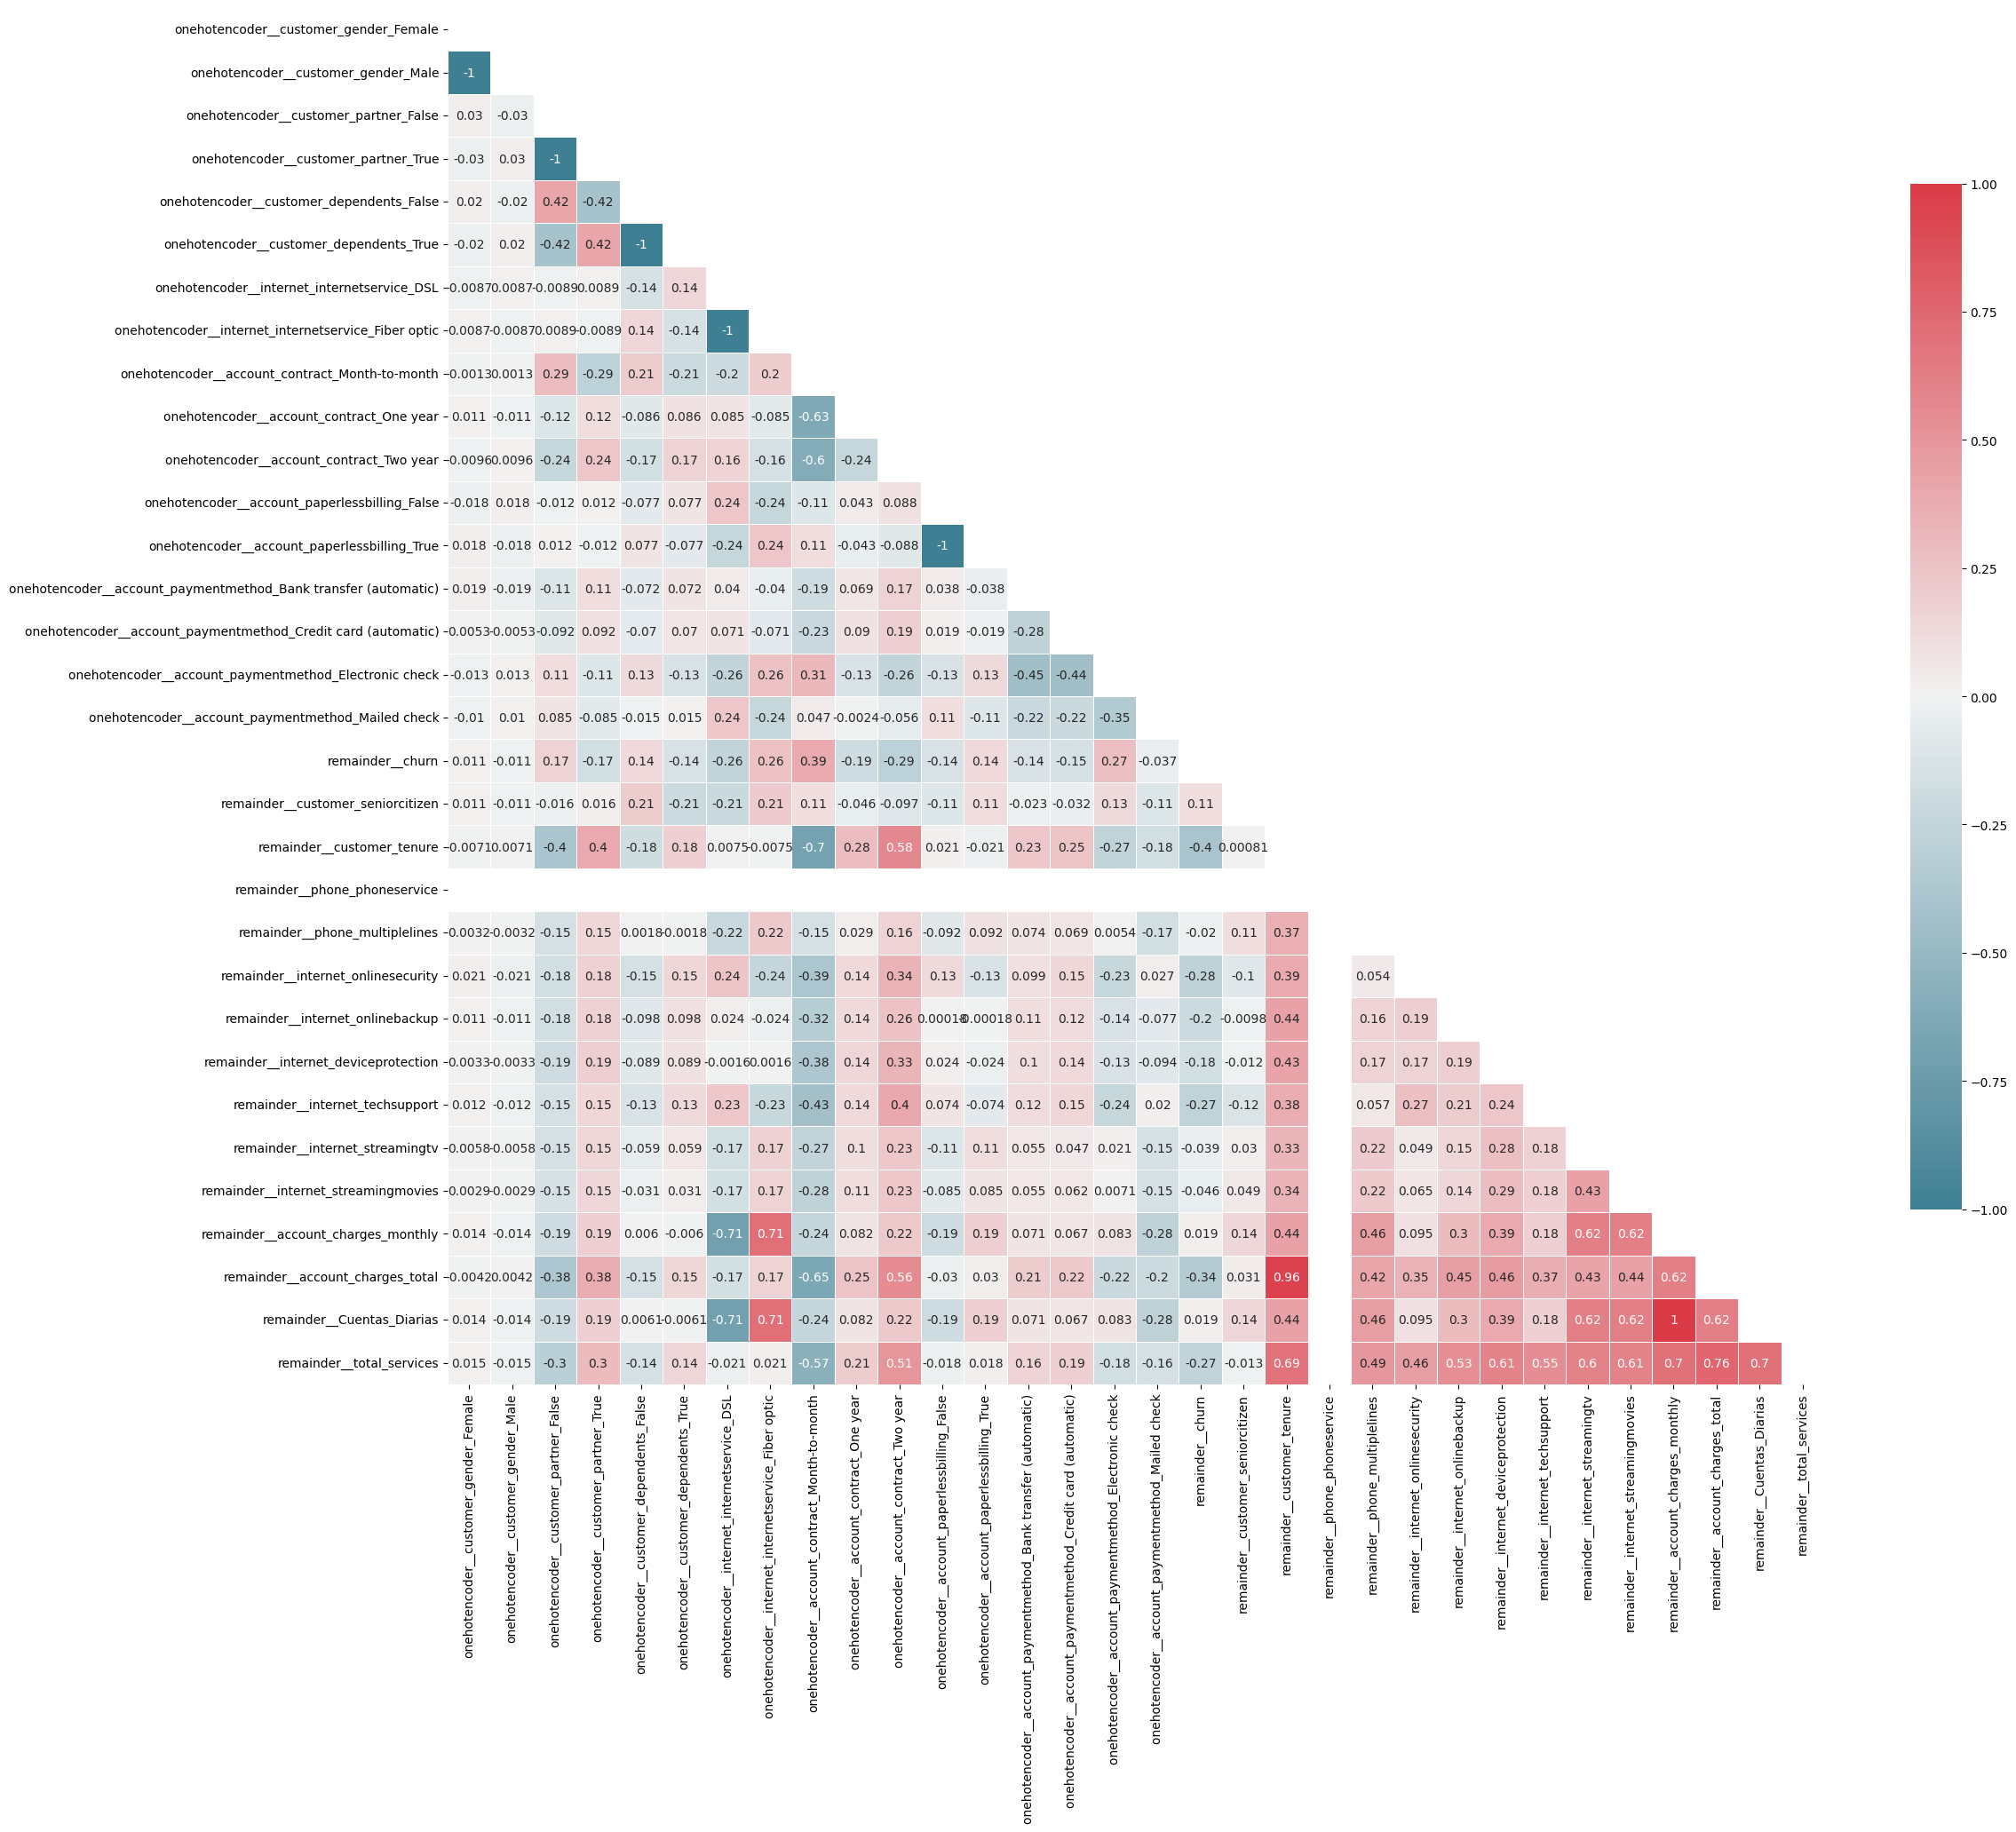

In [14]:
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(25, 30))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## **Análisis Dirigido**

In [15]:
def ancho_bin(df, columna):
    # Calcula el percentil 75 (Q3) y el percentil 25 (Q1) de la columna
    q75, q25 = np.percentile(df[columna], [75, 25])

    # Calcula el rango intercuartílico (IQR), que es Q3 - Q1
    iqr = q75 - q25

    # Aplica la fórmula de Freedman-Diaconis para calcular el ancho óptimo del bin:
    # ancho = 2 * IQR / (n^(1/3)), donde n es el número de datos elevado a la
    # -1/3, negativo porque se aplica la raiz al denominador
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)

    # Retorna el ancho calculado
    return ancho

In [16]:
binwidth = ancho_bin(datos_OneHotEncoder,'remainder__total_services')

### **Total_services segun Churn**

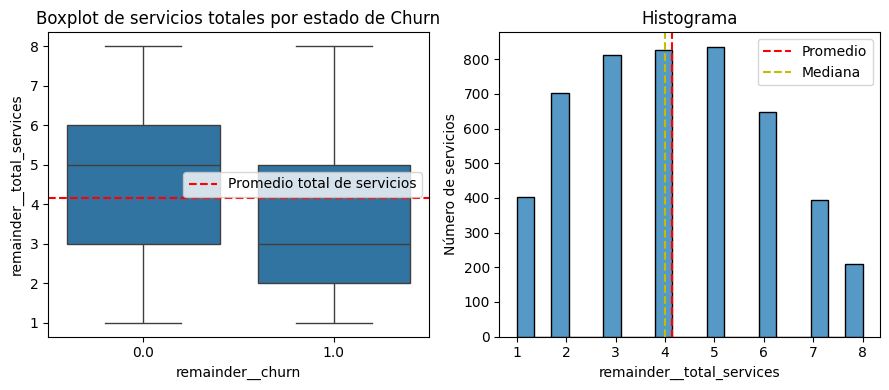

In [17]:
# Calcular el promedio de total_services
total_services_media = datos_OneHotEncoder['remainder__total_services'].mean()
total_servicios_mediana = datos_OneHotEncoder['remainder__total_services'].median()

# Crear figura y ejes
fig, ax = plt.subplots(1,2,figsize=(9,4))

# Hacer el boxplot: comparar total_services entre clientes que se fueron (1) y no se fueron (0)
sns.boxplot(data=datos_OneHotEncoder, x='remainder__churn', y='remainder__total_services', ax=ax[0])

# Título y línea del promedio
ax[0].set_title('Boxplot de servicios totales por estado de Churn')
ax[0].axhline(y=total_services_media, color='r', linestyle='--', label='Promedio total de servicios')
ax[0].legend()

sns.histplot(data=datos_OneHotEncoder, x='remainder__total_services', ax=ax[1], binwidth=binwidth)
plt.ylabel('Número de servicios')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=total_services_media, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=total_servicios_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

### **Account_charges_total por churn**

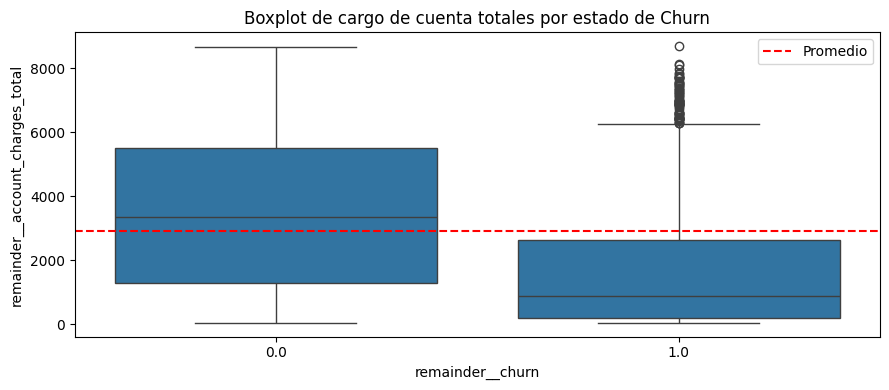

In [18]:
# Calcular el promedio de total_services
total_services_media = datos_OneHotEncoder['remainder__account_charges_total'].mean()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9,4))

# Hacer el boxplot: comparar total_services entre clientes que se fueron (1) y no se fueron (0)
sns.boxplot(data=datos_OneHotEncoder, x='remainder__churn', y='remainder__account_charges_total', ax=ax)

# Título y línea del promedio
ax.set_title('Boxplot de cargo de cuenta totales por estado de Churn')
ax.axhline(y=total_services_media, color='r', linestyle='--', label='Promedio')
ax.legend()

plt.tight_layout()

plt.show()

### **Internet_techsupport segun Churn**

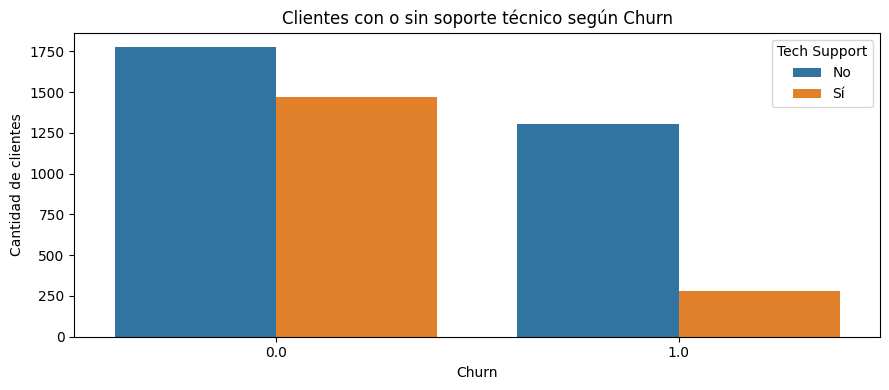

In [19]:
# Calcular el promedio de total_services
total_services_media = datos_OneHotEncoder['remainder__internet_techsupport'].mean()

fig, ax = plt.subplots(figsize=(9, 4))

sns.countplot(data=datos_OneHotEncoder, x='remainder__churn', hue='remainder__internet_techsupport', ax=ax)

ax.set_title('Clientes con o sin soporte técnico según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Tech Support', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

### **Internet_deviceproteccion segun churn**

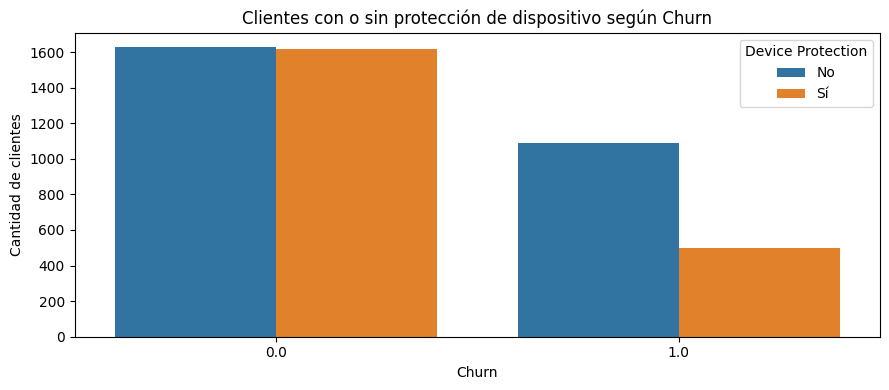

In [20]:
fig, ax = plt.subplots(figsize=(9, 4))

sns.countplot(data=datos_OneHotEncoder, x='remainder__churn', hue='remainder__internet_deviceprotection', ax=ax)

ax.set_title('Clientes con o sin protección de dispositivo según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Device Protection', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

### **Internet_onlinebackup segun churn**

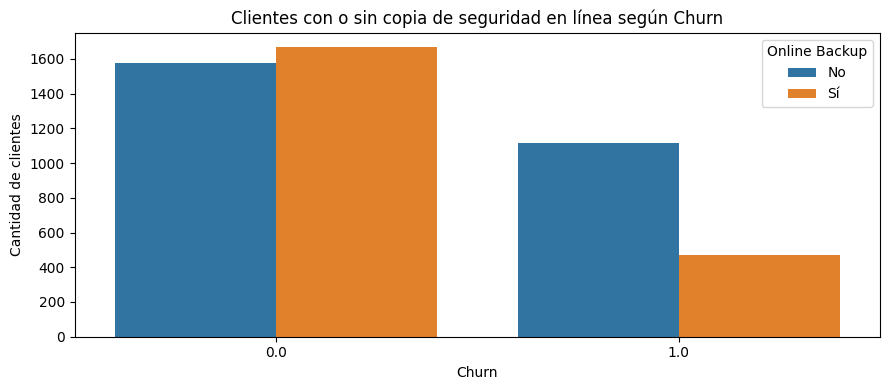

In [21]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 4))

# Crear el gráfico de conteo
sns.countplot(
    data=datos_OneHotEncoder,
    x='remainder__churn',
    hue='remainder__internet_onlinebackup',
    ax=ax
)

# Título y etiquetas
ax.set_title('Clientes con o sin copia de seguridad en línea según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')

# Leyenda personalizada
ax.legend(title='Online Backup', labels=['No', 'Sí'])

# Ajustes finales
plt.tight_layout()
plt.show()

### **internet_onlinesecurity segun churn**

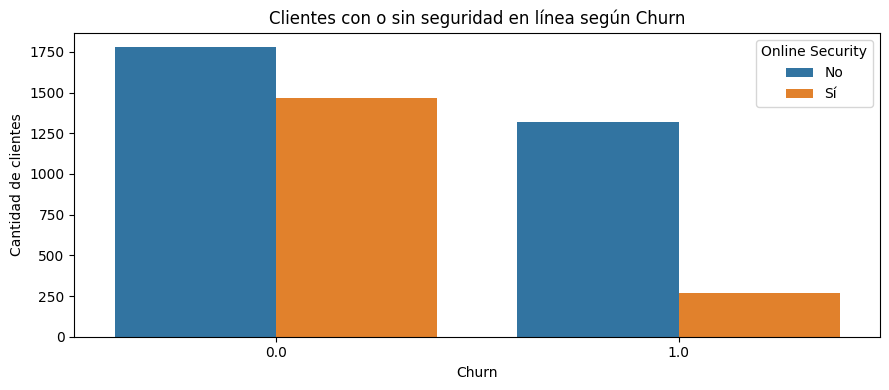

In [22]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Gráfico de conteo
sns.countplot(
    data=datos_OneHotEncoder,
    x='remainder__churn',
    hue='remainder__internet_onlinesecurity',
    ax=ax
)

# Título y etiquetas
ax.set_title('Clientes con o sin seguridad en línea según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')

# Leyenda
ax.legend(title='Online Security', labels=['No', 'Sí'])

# Ajustes finales
plt.tight_layout()
plt.show()

### **Customer_ternure segun churn**

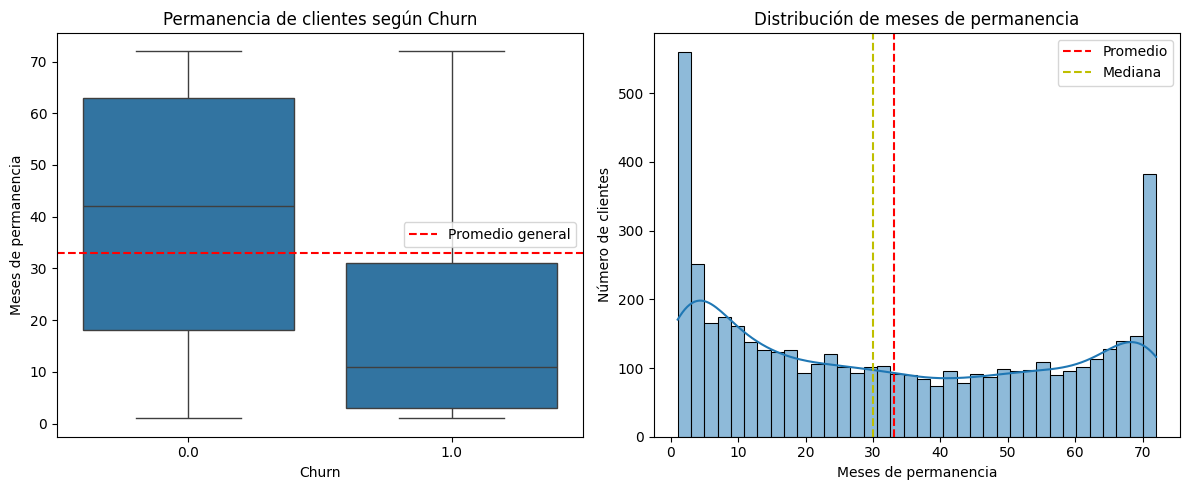

In [23]:
# Calcular medidas estadísticas
tenure_promedio = datos_OneHotEncoder['remainder__customer_tenure'].mean()
tenure_mediana = datos_OneHotEncoder['remainder__customer_tenure'].median()

# Crear figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Boxplot
sns.boxplot(
    data=datos_OneHotEncoder,
    x='remainder__churn',
    y='remainder__customer_tenure',
    ax=ax[0]
)
ax[0].set_title('Permanencia de clientes según Churn')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Meses de permanencia')
ax[0].axhline(y=tenure_promedio, color='r', linestyle='--', label='Promedio general')
ax[0].legend()

# Gráfico 2: Histograma
sns.histplot(
    data=datos_OneHotEncoder,
    x='remainder__customer_tenure',
    kde=True,
    ax=ax[1],
    binwidth=2
)
ax[1].set_title('Distribución de meses de permanencia')
ax[1].set_xlabel('Meses de permanencia')
ax[1].set_ylabel('Número de clientes')
ax[1].axvline(x=tenure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=tenure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

## **Verificación de la Proporción de Cancelación (Churn)**

In [24]:
datos_OneHotEncoder['remainder__churn'].value_counts(normalize=True)

,proportion
remainder__churn,
0.0,0.671772
1.0,0.328228


Las proporciones estan algo desiguales

# **Modelo predictivo**

## **Separación de Datos**

In [25]:
X = datos_OneHotEncoder.drop(['remainder__churn'], axis=1)
y = datos_OneHotEncoder['remainder__churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% para prueba
    stratify=y,            # mantiene proporciones de clases
    random_state=42        # para reproducibilidad
)

## **Normalizacon / Estandarizacion**

Solo para modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Balanceo de clases**

In [28]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# **Creación de Modelos**

## **Modelo Random Forest Classifier**

In [57]:
modelo_random_forest = RandomForestClassifier(max_depth=5, random_state=42)
modelo_random_forest.fit(X_train, y_train)

y_predict = modelo_random_forest.predict(X_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_predict))
print("Reporte completo:\n", classification_report(y_test, y_predict))

matriz_confusion = confusion_matrix(y_test, y_predict)

Accuracy: 0.7549120992761117
Precision: 0.6666666666666666
Recall: 0.5047318611987381
F1 Score: 0.5745062836624776
Matriz de confusión:
 [[570  80]
 [157 160]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       650
         1.0       0.67      0.50      0.57       317

    accuracy                           0.75       967
   macro avg       0.73      0.69      0.70       967
weighted avg       0.75      0.75      0.74       967



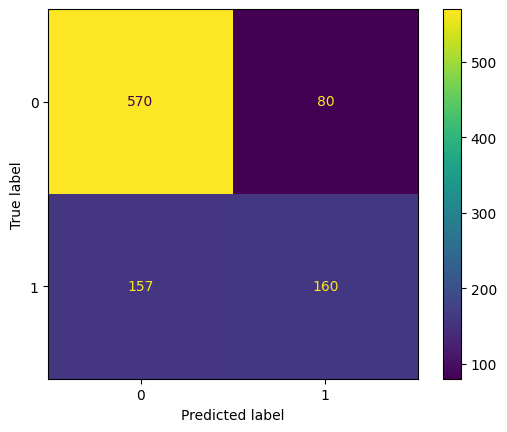

In [59]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot(); # Con el ; nos ahorramos traer matplotlib y nos ahorramos tener que poner plt.show()

In [62]:
importancias_random_forest = modelo_random_forest.feature_importances_
importancias_random_forest

array([0.00195103, 0.00219111, 0.00712741, 0.00481064, 0.00230082,
       0.00280498, 0.07432993, 0.06552853, 0.16815984, 0.0218753 ,
       0.03766006, 0.00722332, 0.00958025, 0.00250428, 0.00501494,
       0.03895775, 0.00119293, 0.0052765 , 0.1833563 , 0.        ,
       0.00323077, 0.05189296, 0.01176689, 0.01175436, 0.04565856,
       0.00439417, 0.00251746, 0.04223505, 0.13421256, 0.03597152,
       0.0145198 ])

In [61]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importances': (importancias_random_forest * 100).round(2)}).sort_values('importances', ascending=False)
feature_importances

,feature,importances
18,remainder__customer_tenure,18.34
8,onehotencoder__account_contract_Month-to-month,16.82
28,remainder__account_charges_total,13.42
6,onehotencoder__internet_internetservice_DSL,7.43
7,onehotencoder__internet_internetservice_Fiber ...,6.55
21,remainder__internet_onlinesecurity,5.19
24,remainder__internet_techsupport,4.57
27,remainder__account_charges_monthly,4.22
15,onehotencoder__account_paymentmethod_Electroni...,3.90
10,onehotencoder__account_contract_Two year,3.77


## **Modelo XGBoost**

In [34]:
modelo_xgb = XGBClassifier(
    max_depth=5,        # Profundidad de los árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    n_estimators=100,   # Número de árboles
    subsample=0.8,      # Submuestreo (para regularización)
    colsample_bytree=0.8,  # Submuestreo de columnas
    use_label_encoder=False,  # Evitar warnings de versiones antiguas
    eval_metric='logloss',    # Métrica de evaluación
    random_state=42
)

In [35]:
# Entrenar el modelo
modelo_xgb.fit(X_train, y_train)

# Predecir
y_pred = modelo_xgb.predict(X_test)

In [36]:
# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.7487073422957601
Precision: 0.6267123287671232
Recall: 0.5772870662460567
F1 Score: 0.6009852216748769
Matriz de confusión:
 [[541 109]
 [134 183]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       650
         1.0       0.63      0.58      0.60       317

    accuracy                           0.75       967
   macro avg       0.71      0.70      0.71       967
weighted avg       0.74      0.75      0.75       967



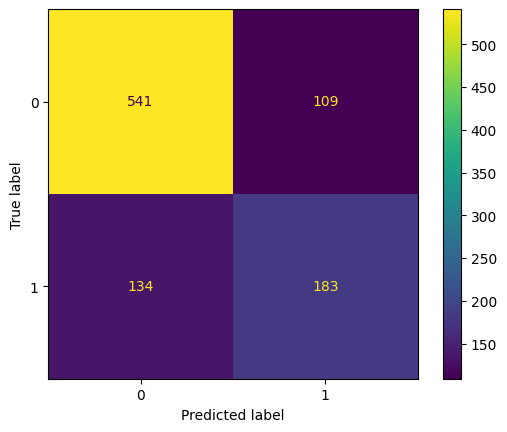

In [37]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Variables importantes**

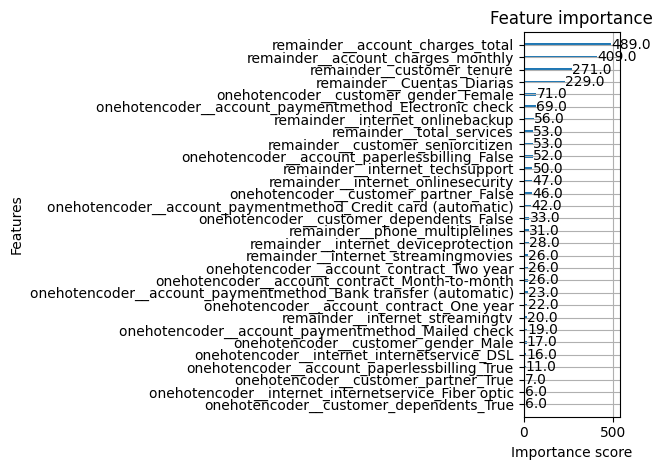

In [38]:
plot_importance(modelo_xgb)
plt.tight_layout()
plt.show()

## **Hiperparametros**

In [39]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [40]:
grid_search = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1      # Usa todos los núcleos disponibles para acelerar
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [42]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predicciones
y_pred = mejor_modelo.predict(X_test)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Matriz de confusión:
 [[547 103]
 [131 186]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       650
         1.0       0.64      0.59      0.61       317

    accuracy                           0.76       967
   macro avg       0.73      0.71      0.72       967
weighted avg       0.75      0.76      0.75       967



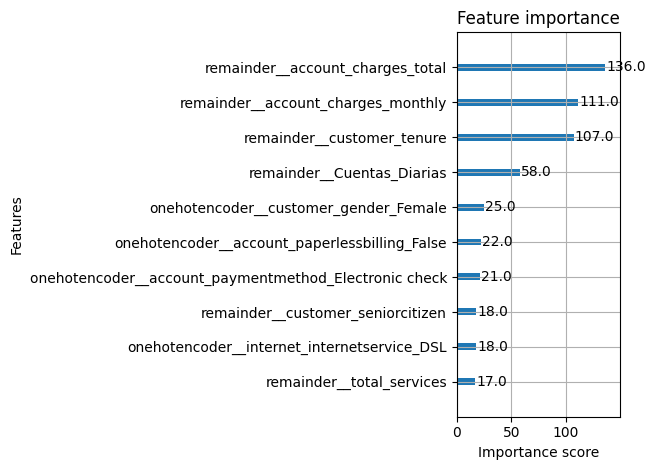

In [43]:
plot_importance(mejor_modelo, max_num_features=10)
plt.tight_layout()
plt.show()

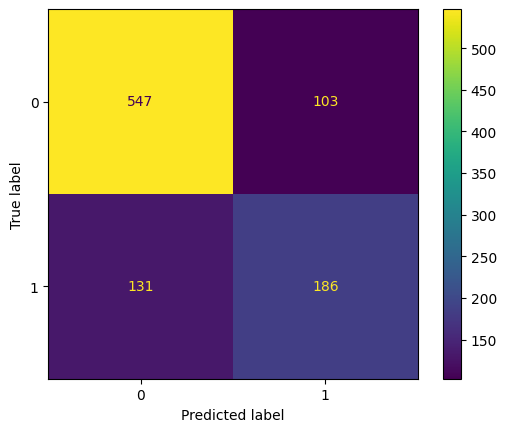

In [44]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Modelo KNN**

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Usa 'macro' si es multiclase
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.7207859358841778
Precision: 0.5830388692579506
Recall: 0.5205047318611987
F1 Score: 0.55
Matriz de confusión:
 [[532 118]
 [152 165]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       650
         1.0       0.58      0.52      0.55       317

    accuracy                           0.72       967
   macro avg       0.68      0.67      0.67       967
weighted avg       0.71      0.72      0.72       967



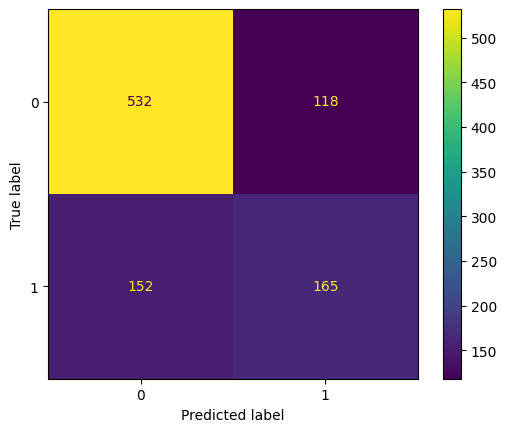

In [51]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Hiperparametros KNN**

In [48]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [49]:
# Aplicar búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Mejor modelo ya entrenado
best_knn = grid_search.best_estimator_

Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [52]:
y_pred = best_knn.predict(X_test)
print("Accuracy final:", accuracy_score(y_test, y_pred))

Accuracy final: 0.733195449844881


In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Usa 'macro' si es multiclase
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.733195449844881
Precision: 0.6064981949458483
Recall: 0.5299684542586751
F1 Score: 0.5656565656565656
Matriz de confusión:
 [[541 109]
 [149 168]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       650
         1.0       0.61      0.53      0.57       317

    accuracy                           0.73       967
   macro avg       0.70      0.68      0.69       967
weighted avg       0.73      0.73      0.73       967



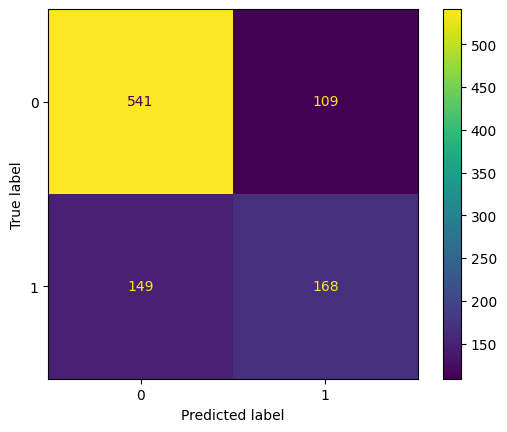

In [54]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Exportar modelo XGBoost**

In [55]:
try:
  with open('championXGBoost.pkl', 'wb') as file:
    pickle.dump(mejor_modelo, file)
  print('modelo serializado con exito')
except Exception as e:
  print('Se presento un erro al almacenar el modelo', str(e))

modelo serializado con exito


## **Exportando modelo RandomForestClassifier**

In [63]:
try:
  with open('championRandomForestClassifier.pkl', 'wb') as file:
    pickle.dump(modelo_random_forest, file)
  print('modelo serializado con exito')
except Exception as e:
  print('Se presento un erro al almacenar el modelo', str(e))

modelo serializado con exito
